In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 
from datetime import datetime


# 1. Data Collection 

In [2]:
# Collect data from 2015 to now

now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end) 
df 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-23,28.958899,29.126394,28.617207,28.652941,183083600
2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600
2015-04-27,29.624414,29.731614,29.289423,29.548484,387816800
2015-04-28,29.157661,30.046505,28.936569,30.028641,475696000
2015-04-29,28.728872,29.387688,28.652942,29.068331,253544400
...,...,...,...,...,...
2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900
2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-23,28.958899,29.126394,28.617207,28.652941,183083600
2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600
2015-04-27,29.624414,29.731614,29.289423,29.548484,387816800
2015-04-28,29.157661,30.046505,28.936569,30.028641,475696000
2015-04-29,28.728872,29.387688,28.652942,29.068331,253544400


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900
2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400
2025-04-17,196.979996,198.830002,194.419998,197.199997,51334300
2025-04-21,193.160004,193.800003,189.809998,193.270004,46742500
2025-04-22,199.740005,201.589996,195.970001,196.119995,52660200


In [5]:
type(df) 

pandas.core.frame.DataFrame

In [6]:
df.shape

(2515, 5)

In [7]:
# Check for Null Values
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,100.100453,101.105071,98.987829,100.003040,1.123708e+08
std,68.271379,68.943290,67.508198,68.189974,6.555688e+07
min,20.674532,20.978904,20.475431,20.596721,2.323470e+07
25%,37.159756,37.507965,36.734300,37.154401,6.874540e+07
50%,76.653244,77.366886,75.655569,76.570372,9.645210e+07
75%,159.105942,160.826144,156.794375,158.613207,1.367109e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [9]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [10]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-23,28.958899,29.126394,28.617207,28.652941,183083600
2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600
2015-04-27,29.624414,29.731614,29.289423,29.548484,387816800
2015-04-28,29.157661,30.046505,28.936569,30.028641,475696000
2015-04-29,28.728872,29.387688,28.652942,29.068331,253544400


In [11]:
df = df.reset_index()

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-04-23,28.958899,29.126394,28.617207,28.652941,183083600
1,2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600
2,2015-04-27,29.624414,29.731614,29.289423,29.548484,387816800
3,2015-04-28,29.157661,30.046505,28.936569,30.028641,475696000
4,2015-04-29,28.728872,29.387688,28.652942,29.068331,253544400


Text(0, 0.5, 'Close Price')

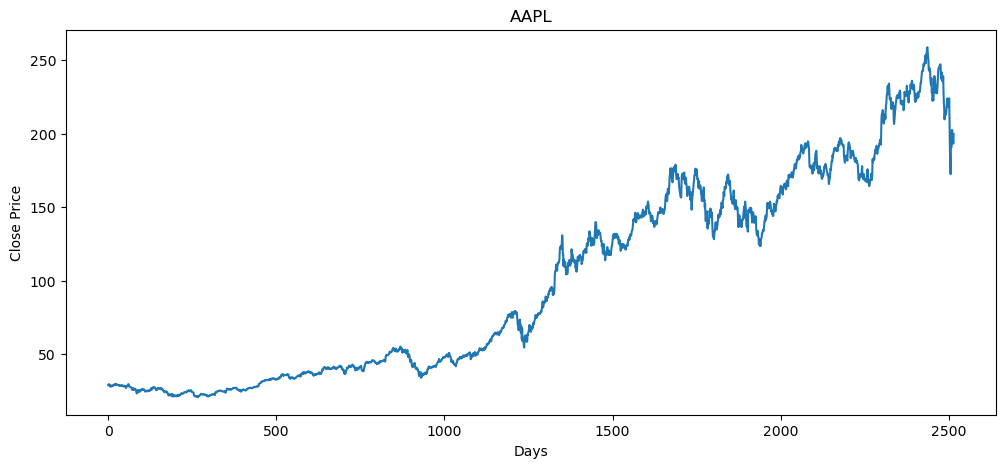

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close) 
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 2. Feature Engineering 

In [14]:
# Calculate Moving Average to determine if trend is moving up or down
#10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA of 5 days ==> 30, 

In [15]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print((temp_df[:5]))

[10, 20, 30, 40, 50]


In [16]:
print(sum(temp_df[1:6])/5)

40.0


In [17]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [18]:
df1['MA_5'] = df1.rolling(5).mean()
df1 

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 Days Moving Average


In [19]:
df['MA_100'] = df.Close.rolling(100).mean()
df 

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-04-23,28.958899,29.126394,28.617207,28.652941,183083600,NaN
1,2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600,NaN
2,2015-04-27,29.624414,29.731614,29.289423,29.548484,387816800,NaN
3,2015-04-28,29.157661,30.046505,28.936569,30.028641,475696000,NaN
4,2015-04-29,28.728872,29.387688,28.652942,29.068331,253544400,NaN
...,...,...,...,...,...,...,...
2510,2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900,231.623011
2511,2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400,231.285418
2512,2025-04-17,196.979996,198.830002,194.419998,197.199997,51334300,230.967733


In [20]:
df.head(110)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-04-23,28.958899,29.126394,28.617207,28.652941,183083600,NaN
1,2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600,NaN
2,2015-04-27,29.624414,29.731614,29.289423,29.548484,387816800,NaN
3,2015-04-28,29.157661,30.046505,28.936569,30.028641,475696000,NaN
4,2015-04-29,28.728872,29.387688,28.652942,29.068331,253544400,NaN
...,...,...,...,...,...,...,...
105,2015-09-22,25.546257,25.721972,25.348013,25.541751,201384800,27.434508
106,2015-09-23,25.753517,25.843628,25.523737,25.598076,143026800,27.404062
107,2015-09-24,25.906698,26.019336,25.314224,25.512466,200878000,27.375706


Text(0, 0.5, 'Price')

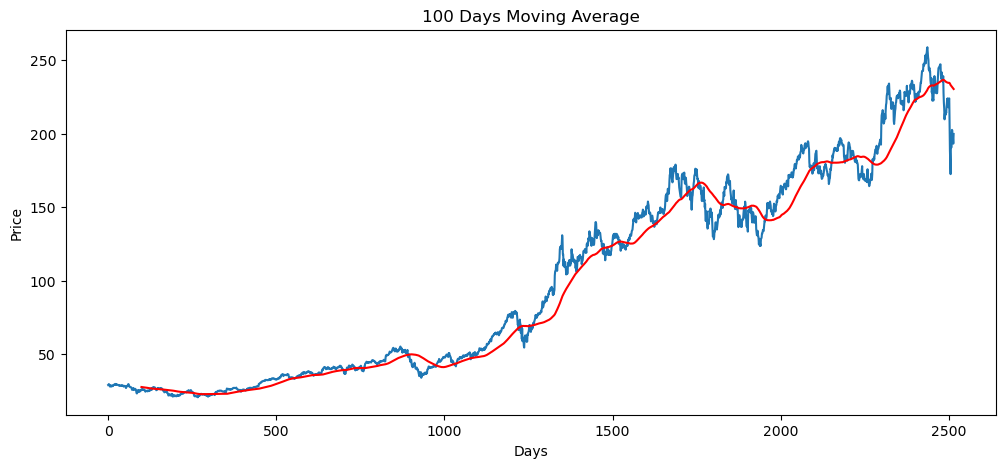

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close) 
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

### 200 Days Moving Average

In [22]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(210)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-04-23,28.958899,29.126394,28.617207,28.652941,183083600,NaN,NaN
1,2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600,NaN,NaN
2,2015-04-27,29.624414,29.731614,29.289423,29.548484,387816800,NaN,NaN
3,2015-04-28,29.157661,30.046505,28.936569,30.028641,475696000,NaN,NaN
4,2015-04-29,28.728872,29.387688,28.652942,29.068331,253544400,NaN,NaN
...,...,...,...,...,...,...,...,...
205,2016-02-16,21.982466,22.030234,21.520707,21.613968,196231600,24.652619,26.043563
206,2016-02-17,22.319118,22.339590,21.871007,21.989289,179452800,24.618275,26.011169
207,2016-02-18,21.896029,22.494268,21.857358,22.482894,156084000,24.578169,25.976937


Text(0, 0.5, 'Price')

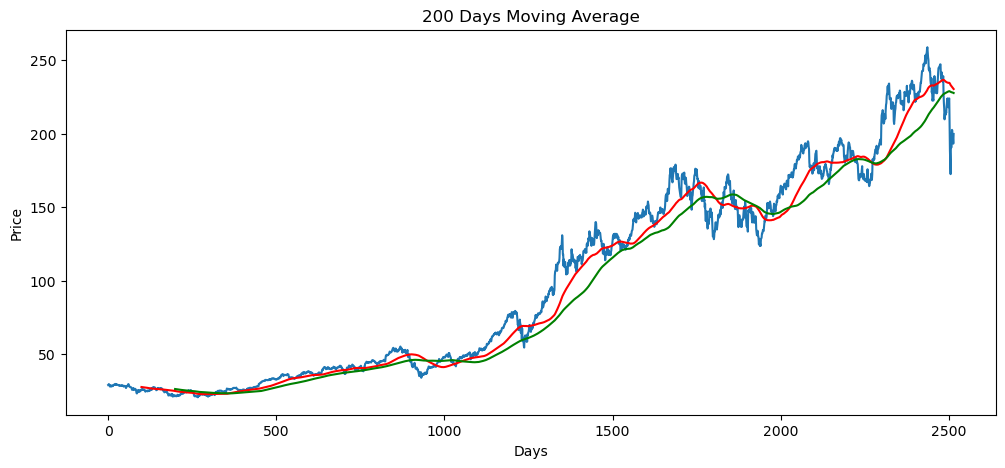

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close) 
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

### Calculate % Change in Each Trading Session

In [24]:
df['Percentage Change'] = df.Close.pct_change()
df[['Close', 'Percentage Change']]

Price,Close,Percentage Change
Ticker,AAPL,
0,28.958899,NaN
1,29.095135,0.004704
2,29.624414,0.018191
3,29.157661,-0.015756
4,28.728872,-0.014706
...,...,...
2510,202.139999,-0.001876
2511,194.270004,-0.038933
2512,196.979996,0.013950


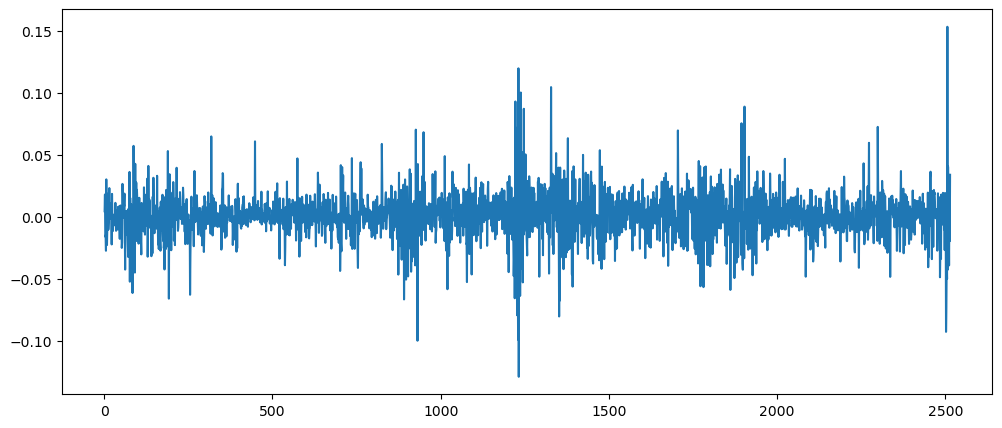

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Change']) 

# 4 Data Preprocessing

In [26]:
df.shape

(2515, 9)

In [27]:
# Training and Testing Data Split
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7) : int(len(df))])
print(data_training)
print(data_testing)

Ticker        AAPL
0        28.958899
1        29.095135
2        29.624414
3        29.157661
4        28.728872
...            ...
1755    163.107086
1756    164.986633
1757    167.682922
1758    162.654419
1759    162.437943

[1760 rows x 1 columns]
Ticker        AAPL
1760    164.730774
1761    164.563492
1762    163.766403
1763    159.210220
1764    160.282883
...            ...
2510    202.139999
2511    194.270004
2512    196.979996
2513    193.160004
2514    199.740005

[755 rows x 1 columns]


In [28]:
# Scaling Data To Fit between 0 and 1 

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05236464],
       [0.05322577],
       [0.0565713 ],
       ...,
       [0.92922506],
       [0.8974404 ],
       [0.89607207]])

In [31]:
type(data_training_array)

numpy.ndarray

In [32]:
data_training_array.shape

(1760, 1)

# 5. Sequence Creation 

In [33]:
# Tomorrow's stock price is dependant on the previous days prices

In [34]:
X_train = []
y_train = []

for i in range(100,  data_training_array.shape[0]):
    X_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

In [35]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[[0.05236464],
        [0.05322577],
        [0.0565713 ],
        ...,
        [0.02961181],
        [0.03194704],
        [0.03351341]],

       [[0.05322577],
        [0.0565713 ],
        [0.053621  ],
        ...,
        [0.03194704],
        [0.03351341],
        [0.03489469]],

       [[0.0565713 ],
        [0.053621  ],
        [0.05091066],
        ...,
        [0.03351341],
        [0.03489469],
        [0.03507977]],

       ...,

       [[0.85003771],
        [0.8666864 ],
        [0.86960611],
        ...,
        [0.92729694],
        [0.90030166],
        [0.91218209]],

       [[0.8666864 ],
        [0.86960611],
        [0.87202901],
        ...,
        [0.90030166],
        [0.91218209],
        [0.92922506]],

       [[0.86960611],
        [0.87202901],
        [0.8753214 ],
        ...,
        [0.91218209],
        [0.92922506],
        [0.8974404 ]]])

In [36]:
X_train.ndim

3

In [37]:
y_train.ndim

1

In [38]:
X_train.shape

(1660, 100, 1)

In [39]:
y_train.shape

(1660,)

# 6. Model Building

In [40]:
import tensorflow as tf

2025-04-23 13:55:24.198317: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
print(tf.__version__)

2.17.0


In [42]:
# ML Model 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [43]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training 

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0343
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 4.6698e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 4.2399e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 4.4827e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 4.4095e-04 
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 3.5738e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 3.5255e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 3.2976e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 3.5268e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 3.1142e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 3.6225e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 3.2713e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 3.1957e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 4.1144e-04
Epo

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [46]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [49]:
data_training.tail()

Ticker,AAPL
1755,163.107086
1756,164.986633
1757,167.682922
1758,162.654419
1759,162.437943


In [47]:
data_testing

Ticker,AAPL
1760,164.730774
1761,164.563492
1762,163.766403
1763,159.210220
1764,160.282883
...,...
2510,202.139999
2511,194.270004
2512,196.979996
2513,193.160004


In [50]:
past_100_days = data_training.tail(100)
past_100_days

Ticker,AAPL
1660,158.634201
1661,159.155075
1662,154.113312
1663,157.484314
1664,162.457275
...,...
1755,163.107086
1756,164.986633
1757,167.682922
1758,162.654419


In [51]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,158.634201
1,159.155075
2,154.113312
3,157.484314
4,162.457275
...,...
850,202.139999
851,194.270004
852,196.979996
853,193.160004


In [52]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.59345051e-01],
       [2.63199026e-01],
       [2.25894747e-01],
       [2.50836975e-01],
       [2.87632185e-01],
       [2.83778548e-01],
       [2.76433800e-01],
       [2.62471946e-01],
       [2.87777827e-01],
       [3.30390466e-01],
       [3.58750646e-01],
       [3.54969154e-01],
       [3.90528102e-01],
       [3.63550164e-01],
       [3.53296757e-01],
       [3.89437595e-01],
       [3.38243832e-01],
       [3.30099634e-01],
       [3.19991756e-01],
       [3.43552532e-01],
       [3.62822858e-01],
       [3.67476621e-01],
       [3.96927308e-01],
       [3.89364774e-01],
       [3.90019146e-01],
       [3.81438587e-01],
       [3.76857307e-01],
       [4.09144057e-01],
       [3.92346141e-01],
       [3.57587206e-01],
       [3.36353537e-01],
       [3.37589573e-01],
       [3.37734989e-01],
       [3.58750646e-01],
       [3.62022732e-01],
       [3.37734989e-01],
       [3.44134083e-01],
       [3.20355296e-01],
       [2.94395044e-01],
       [2.81887350e-01],


In [53]:
input_data.shape

(855, 1)

In [56]:
X_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [59]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test[0].shape

(100, 1)

# 9 Making Predictions

In [60]:
y_predicted = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step 


In [61]:
y_predicted 

array([[0.29613853],
       [0.29785365],
       [0.3009908 ],
       [0.3010335 ],
       [0.28669032],
       [0.27727485],
       [0.2554044 ],
       [0.23812497],
       [0.24763992],
       [0.24496642],
       [0.24125826],
       [0.24280658],
       [0.26355976],
       [0.2562215 ],
       [0.24598992],
       [0.22419769],
       [0.21359655],
       [0.1890172 ],
       [0.159973  ],
       [0.15021658],
       [0.1455887 ],
       [0.15326256],
       [0.1426003 ],
       [0.12207865],
       [0.10549422],
       [0.1071551 ],
       [0.10820892],
       [0.10929494],
       [0.11755301],
       [0.13962394],
       [0.15775308],
       [0.16832086],
       [0.17898709],
       [0.17089447],
       [0.1615361 ],
       [0.16090119],
       [0.16113353],
       [0.14865068],
       [0.12380207],
       [0.09197798],
       [0.06975278],
       [0.0622486 ],
       [0.05099798],
       [0.04483053],
       [0.05096881],
       [0.05907821],
       [0.07200678],
       [0.090

In [62]:
y_test

array([3.04453923e-01, 3.03216194e-01, 2.97318492e-01, 2.63607049e-01,
       2.71543736e-01, 2.27274505e-01, 2.25599964e-01, 2.77077220e-01,
       2.33463491e-01, 2.35720487e-01, 2.46787907e-01, 2.94405995e-01,
       2.27056156e-01, 2.32452014e-01, 1.94389043e-01, 2.12253757e-01,
       1.53846888e-01, 1.25117184e-01, 1.58294833e-01, 1.46846712e-01,
       1.73826117e-01, 1.12429527e-01, 8.71270336e-02, 8.88768800e-02,
       1.29127639e-01, 1.09075476e-01, 1.10242078e-01, 1.34013187e-01,
       1.76742904e-01, 1.70909217e-01, 1.69961755e-01, 1.88191139e-01,
       1.45679884e-01, 1.51221723e-01, 1.69961755e-01, 1.64492737e-01,
       1.25700428e-01, 8.55228289e-02, 4.72409435e-02, 5.36577623e-02,
       7.31267941e-02, 3.39699290e-02, 4.49076267e-02, 7.63349777e-02,
       7.25435496e-02, 9.38353617e-02, 1.18554723e-01, 1.18554723e-01,
       8.77833248e-02, 1.00835538e-01, 8.25329951e-02, 9.86478628e-02,
       1.17825160e-01, 1.27742123e-01, 1.52753107e-01, 1.57784070e-01,
      

In [63]:
# Convert scaled data back to original state
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten() 
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [64]:
y_predicted

array([163.60692 , 163.83873 , 164.26273 , 164.2685  , 162.32999 ,
       161.05745 , 158.10162 , 155.76625 , 157.05222 , 156.69089 ,
       156.18973 , 156.39899 , 159.20384 , 158.21205 , 156.82922 ,
       153.88396 , 152.45119 , 149.12921 , 145.20383 , 143.88522 ,
       143.25977 , 144.2969  , 142.85587 , 140.08232 , 137.8409  ,
       138.06535 , 138.20778 , 138.35457 , 139.47066 , 142.45361 ,
       144.90381 , 146.33206 , 147.77364 , 146.6799  , 145.41508 ,
       145.32927 , 145.36067 , 143.67358 , 140.31523 , 136.01413 ,
       133.01035 , 131.99614 , 130.47559 , 129.64204 , 130.47165 ,
       131.56766 , 133.31499 , 135.82823 , 137.88812 , 137.83772 ,
       137.6158  , 136.59818 , 136.27357 , 137.05319 , 138.39615 ,
       140.62596 , 142.70674 , 143.35913 , 143.64783 , 143.5718  ,
       144.36919 , 145.7403  , 145.79141 , 146.75192 , 148.36554 ,
       150.45871 , 151.52902 , 151.49188 , 150.63168 , 151.6563  ,
       153.07031 , 156.03874 , 158.04274 , 158.44543 , 160.572

In [65]:
y_test

array([164.73077393, 164.56349182, 163.7664032 , 159.21022034,
       160.28288269, 154.29978943, 154.07347107, 161.03074646,
       155.13624573, 155.44128418, 156.93707275, 163.37277222,
       154.27027893, 154.99954224, 149.85523987, 152.2696991 ,
       144.37586975, 140.49298096, 144.97702026, 143.42977905,
       147.07611084, 138.7782135 , 135.35852051, 135.59501648,
       141.03500366, 138.3249054 , 138.48257446, 141.69529724,
       147.47032166, 146.68188477, 146.55383301, 149.01757812,
       143.27207947, 144.02107239, 146.55383301, 145.81468201,
       140.57180786, 135.14170837, 129.96781921, 130.83506775,
       133.46635437, 128.17420959, 129.65246582, 133.89994812,
       133.38752747, 136.26516724, 139.60604858, 139.60604858,
       135.44721985, 137.21125793, 134.73762512, 136.91558838,
       139.50744629, 140.8477478 , 144.2280426 , 144.9079895 ,
       142.76947021, 143.74513245, 143.38049316, 146.31729126,
       147.99264526, 144.93760681, 148.81062317, 150.82

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

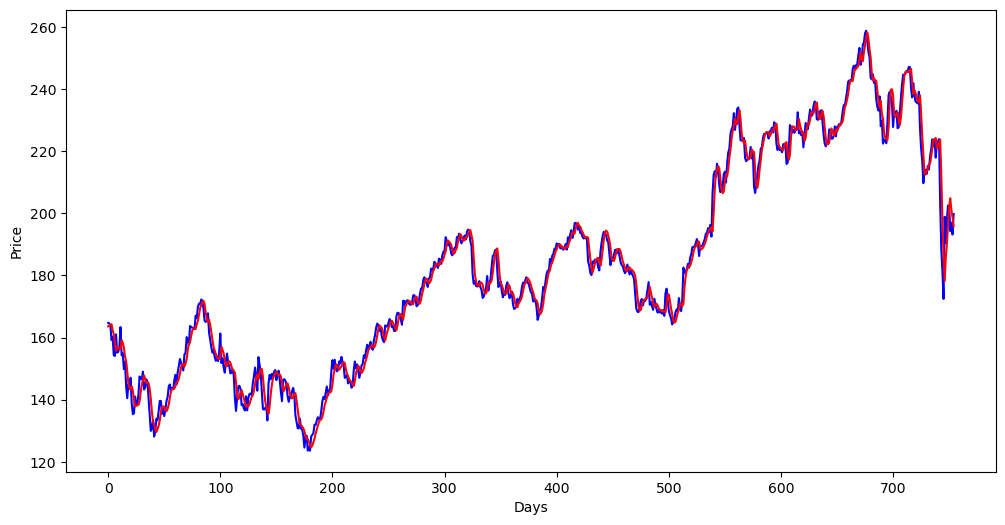

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend

(140.0, 220.0)

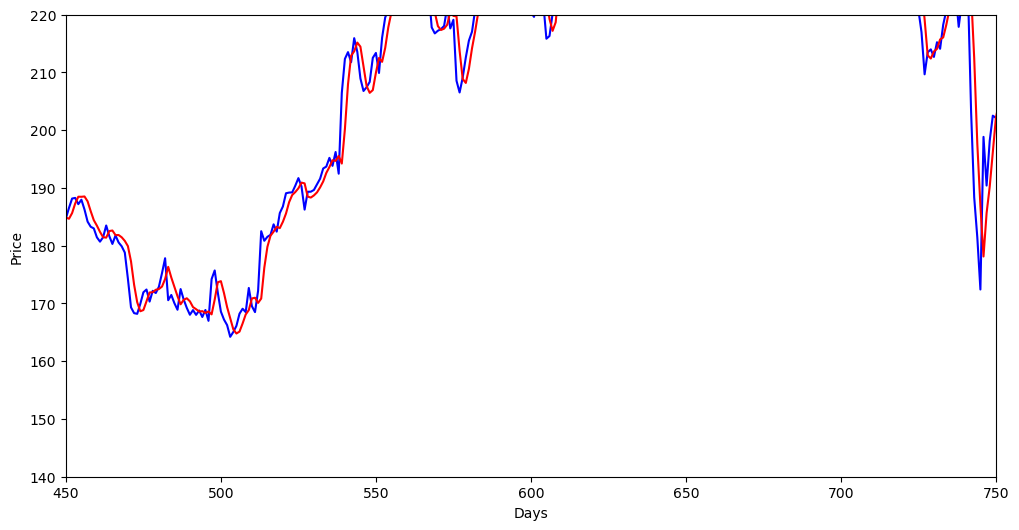

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. Model Evaluation

In [72]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 14.492717236292702


In [71]:
# Roor Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f" Root Mean Squared Error (RMSE): {rmse}")

 Root Mean Squared Error (RMSE): 3.8069301591036186


In [73]:
# R-Squared 
r2 = r2_score(y_test, y_predicted)
print(f" R-Squared: {r2}")

 R-Squared: 0.9866085339946976
